# MAIS 202: Assignment 4

#### Feel free to reach out to Daoud on Slack if you have any questions/clarifications regarding this assignment.

### Intro/Overview:

A lot of the assignments so far have been applied and implementing the algorithms you have learnt. This assignment is aimed to switch gears for a bit. The aim is to help you get a deeper understanding of theory you've learnt. For non-coding questions, please use the Markdown option and continue within the same Jupyter notebook.

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression. Each in 3 lines or less

- Describe overfitting vs underfitting with respect to parameters.  


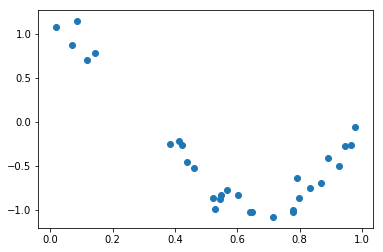

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Part b)

#this is the true function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# randomly generating x values between 0,1
np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

#time to see what it looks like
plt.scatter(X,y)

### Your code here###
# Model the above distribution using polynomial regression. How many features do you need.
# What happens if you use a polynomail of a higher/lower order.
# How many degrees best model this?
# Show an example of underfitting/overfitting the distribution. Comment what happens in each case.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example where you would use logistic regression but not SVM
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- Explain the "training" and "testing" phase of a k-NN model. Use text, code, plots, diagrams, etc as necessary.
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

### 4) Ensemble Methods
- Explain bagging, boosting and clealry illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

### 5) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

### 6) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [57]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


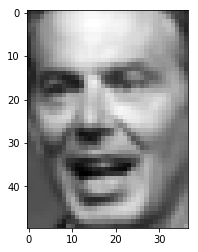

In [58]:
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###



## Bonus Challenge!

This will take some time. However, trust that it is a rewarding experience. Not only that, there will be a prize for whoever implements it correctly.

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

